In [ ]:
import matplotlib.pyplot as plt

# File path
# file_path = "./iid_accuracy.txt"
# file_path = "./non-iid-0.9_accuracy.txt"
file_path = "./non-iid-0.5_accuracy.txt"
# file_path = "./non-iid-0.1_accuracy.txt"

# Initialize dictionaries to store accuracy values
accuracy_data = {
    "random_selection": [],
    "loss_selection": [],
    "distance_selection": []
}

# Read and parse the data
with open(file_path, "r") as file:
    for line in file:
        if line.startswith("random_selection:"):
            accuracy = float(line.split(":")[1].strip())
            accuracy_data["random_selection"].append(accuracy)
        elif line.startswith("loss_selection:"):
            accuracy = float(line.split(":")[1].strip())
            accuracy_data["loss_selection"].append(accuracy)
        elif line.startswith("distance_selection:"):
            accuracy = float(line.split(":")[1].strip())
            accuracy_data["distance_selection"].append(accuracy)

# Generate rounds (x-axis)
rounds = list(range(1, len(accuracy_data["random_selection"]) + 1))

# Plot the data
plt.figure(figsize=(10, 6))

plt.plot(rounds, accuracy_data["random_selection"], label="Random Selection")
plt.plot(rounds, accuracy_data["loss_selection"], label="Loss Selection")
plt.plot(rounds, accuracy_data["distance_selection"], label="Distance Selection")

# Add labels and title
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.title("non-iid-0.1")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

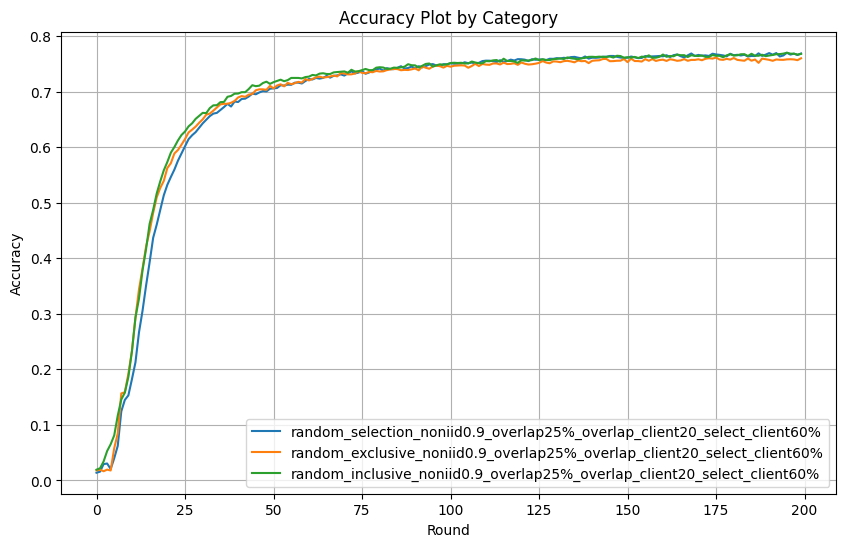

In [1]:
#read the 100select10.txt file
import matplotlib.pyplot as plt

# File path
# file_path = './100select60_noniid0.1.txt'
# file_path = './100select60_noniid0.9.txt'
# file_path = './100select60_noniid0.1_overlap0.25.txt'
file_path = './100select60_noniid0.9_overlap0.25.txt'


# Read and parse the data
categories = {}
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        category, value = line.strip().split(': ')
        value = float(value)
        if category not in categories:
            categories[category] = []
        categories[category].append(value)

# Plot the data
plt.figure(figsize=(10, 6))
for category, values in categories.items():
    plt.plot(values, label=category)

plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot by Category')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
#calculate the min,max and average of the last 10 values for file each category
import re
import pandas as pd

def read_data(file_path):
    data = {}
    with open(file_path, 'r') as file:
        for line in file:
            match = re.match(r'(.+):\s+([\d.]+)', line)
            if match:
                category = match.group(1)
                value = float(match.group(2))
                if category not in data:
                    data[category] = []
                data[category].append(value)
    return data

def calculate_stats(data):
    stats = {}
    for category, values in data.items():
        last_10_values = values[-10:]
        min_value = min(last_10_values)
        max_value = max(last_10_values)
        average_value = sum(last_10_values) / len(last_10_values)
        stats[category] = {
            'min': min_value,
            'max': max_value,
            'average': average_value
        }
    return stats

# File path to the data file
# file_path = './100select60_noniid0.1_overlap0.25.txt'
file_path = './100select60_noniid0.9_overlap0.25.txt'


# Read data from the file
data = read_data(file_path)

# Calculate statistics
stats = calculate_stats(data)

# Convert stats to a DataFrame for better visualization
stats_df = pd.DataFrame(stats).T

# Display the statistics
stats_df

,min,max,average
random_selection_noniid0.9_overlap25%_overlap_client20_select_client60%,0.763203,0.769814,0.767207
random_exclusive_noniid0.9_overlap25%_overlap_client20_select_client60%,0.755370,0.759941,0.757501
random_inclusive_noniid0.9_overlap25%_overlap_client20_select_client60%,0.764888,0.769917,0.767425


In [ ]:
#read the 100select10.txt file and apply moving average to smooth the plot

import matplotlib.pyplot as plt
import numpy as np

# File path
file_path = './100select60_noniid0.1.txt'

# Read and parse the data
categories = {}
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        category, value = line.strip().split(': ')
        value = float(value)
        if category not in categories:
            categories[category] = []
        categories[category].append(value)

# Function to apply moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot the data
plt.figure(figsize=(10, 6))
window_size = 10  # Adjust the window size for smoothing

for category, values in categories.items():
    smoothed_values = moving_average(values, window_size)
    plt.plot(smoothed_values, label=category)

plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title('Smoothed Accuracy Plot by Category')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# read the 100select10.txt file and calculate the final accuracy and convergence speed for each category
import numpy as np
import pandas as pd

# File path
file_path = './100select60_noniid0.1.txt'

# Read and parse the data
categories = {}
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines:
        category, value = line.strip().split(': ')
        value = float(value)
        if category not in categories:
            categories[category] = []
        categories[category].append(value)

# Calculate final accuracy for each category (after convergence)
final_accuracies = {category: values[-1] for category, values in categories.items()}

# Calculate convergence speed for each category
convergence_speeds = {}
for category, values in categories.items():
    # Calculate the rate of change in accuracy
    rate_of_change = np.diff(values)
    # Calculate the average rate of change
    convergence_speed = np.mean(rate_of_change)
    convergence_speeds[category] = convergence_speed

# Sort categories by final accuracy
sorted_by_accuracy = sorted(final_accuracies.items(), key=lambda x: x[1], reverse=True)

# Sort categories by convergence speed
sorted_by_convergence_speed = sorted(convergence_speeds.items(), key=lambda x: x[1], reverse=True)

# Print the results
print("Accuracy Ranking (After Convergence):")
for category, accuracy in sorted_by_accuracy:
    print(f"{category}: {accuracy:.4f}")

print("\nConvergence Speed Ranking:")
for category, speed in sorted_by_convergence_speed:
    print(f"{category}: {speed:.4f}")